In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = "/home/n2401517d/my_workspace/HMC_NF"
sys.path.append(path)

from utils import classify_particles, plot_state_histogram, calculate_well_statistics


In [ ]:
free_energy_array = []
START_IDX = 0
HALF_BOX = 5
R0 = 1.2

for run_num in range(1, 101):
    run_str = f"{run_num:03d}"  # Format as 001, 002, etc.
    
    try:
        # Load configurations for this run
        configs_testing_path = f"/home/n2401517d/my_workspace/HMC_NF/results/test_feeding_N3_T_1.0_V_0.50KT_pnas_full/mc_runs/run_{run_str}/mc_run_testing_configs.npy"
        testing_configs = np.load(configs_testing_path)
        testing_configs = testing_configs[START_IDX:]
        
        avg_x_values, p_a_values, p_b_values, deltaF_normalized_values, runs = calculate_well_statistics(testing_configs, 0, HALF_BOX, R0)
        
        # Add this run's free energy data to the array
        free_energy_array.append(deltaF_normalized_values)

        if run_num % 50 == 0:    
            
            # Create figure with subplots
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
            
            # Plot individual particle positions and average x position
            ax1.plot(runs, avg_x_values, 'blue', label='Average x position', alpha=1.0)
            ax1.set_xlabel('Sample number')
            ax1.set_ylabel('Average x position')
            ax1.set_title('Average x Position vs Sample number')
            ax1.set_ylim(0, HALF_BOX * 2)
            ax1.legend()
            
            # Plot probabilities over time
            ax2.plot(runs, p_a_values, 'r-', label='P(well A)')
            ax2.plot(runs, p_b_values, 'g-', label='P(well B)')
            ax2.set_xlabel('Sample number')
            ax2.set_ylabel('Probability')
            ax2.set_title('Well Probabilities vs Sample number')
            ax2.legend()
            
            # Plot free energy difference over time
            ax3.plot(runs, deltaF_normalized_values, 'k-', label='ΔF')
            ax3.set_xlabel('Sample number')
            ax3.set_ylabel(r'$\Delta F\, / k_B T$')
            ax3.set_title('Free Energy Difference vs Sample number')
            ax3.legend()
            
            # Add text label with final free energy value
            final_deltaF = deltaF_normalized_values[-1]
            ax3.text(0.98, 0.1, f'Final ΔF = {final_deltaF:.3f}', 
                    horizontalalignment='right',
                    verticalalignment='top',
                    transform=ax3.transAxes)
            
            plt.tight_layout()
            
            plt.show()
            plt.close(fig)
        
    except Exception as e:
        print(f"Error processing run {run_num}: {e}")

#AVG FREE ENERGY ACROSS ALL RUNS PLOT
# Convert list of free energy arrays to numpy array for calculations
all_deltaF = np.array(free_energy_array)

# Calculate mean and standard error across runs
mean_deltaF = np.nanmean(all_deltaF, axis=0)
sem_deltaF = np.nanstd(all_deltaF, axis=0) / np.sqrt(all_deltaF.shape[0])
std_deltaF = np.nanstd(all_deltaF, axis=0)

print("final mean delta f =", mean_deltaF[-1])
print("final standard error delta f =", sem_deltaF[-1])
print("final std delta f =", std_deltaF[-1])

# Plot the average free energy with error shading
steps = np.arange(1, len(mean_deltaF) + 1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(steps, mean_deltaF, color='black', lw=2, label='Average ΔF')
ax.fill_between(steps, mean_deltaF - sem_deltaF, mean_deltaF + sem_deltaF, 
                color='gray', alpha=0.3, label='±1 SEM')
# Add text annotations for final values
ax.text(0.98, 0.12, f'Final ΔF = {mean_deltaF[-1]:.3f}', 
        transform=ax.transAxes, ha='right', va='top')
ax.text(0.98, 0.07, f'SEM = {sem_deltaF[-1]:.3f}',
        transform=ax.transAxes, ha='right', va='top')

ax.set_xlabel('Sample Number')
ax.set_ylabel(r'$\Delta F\, / k_B T$')
ax.set_title('Average Free Energy Difference with Standard Deviation')
ax.legend()
plt.tight_layout()
plt.show(fig)

at run 10
at run 20
at run 30
at run 40
at run 50


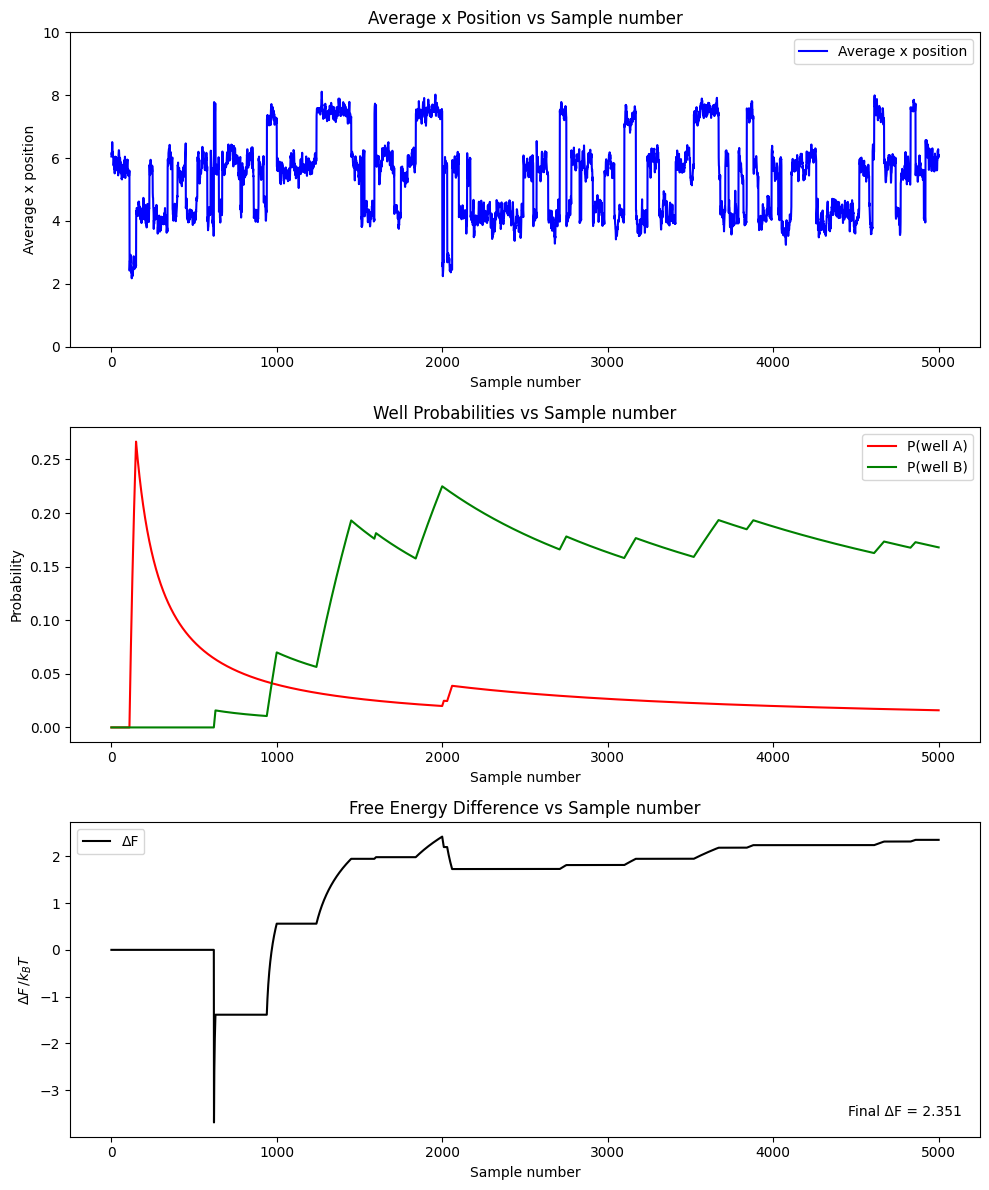

at run 60
at run 70
at run 80
at run 90
at run 100


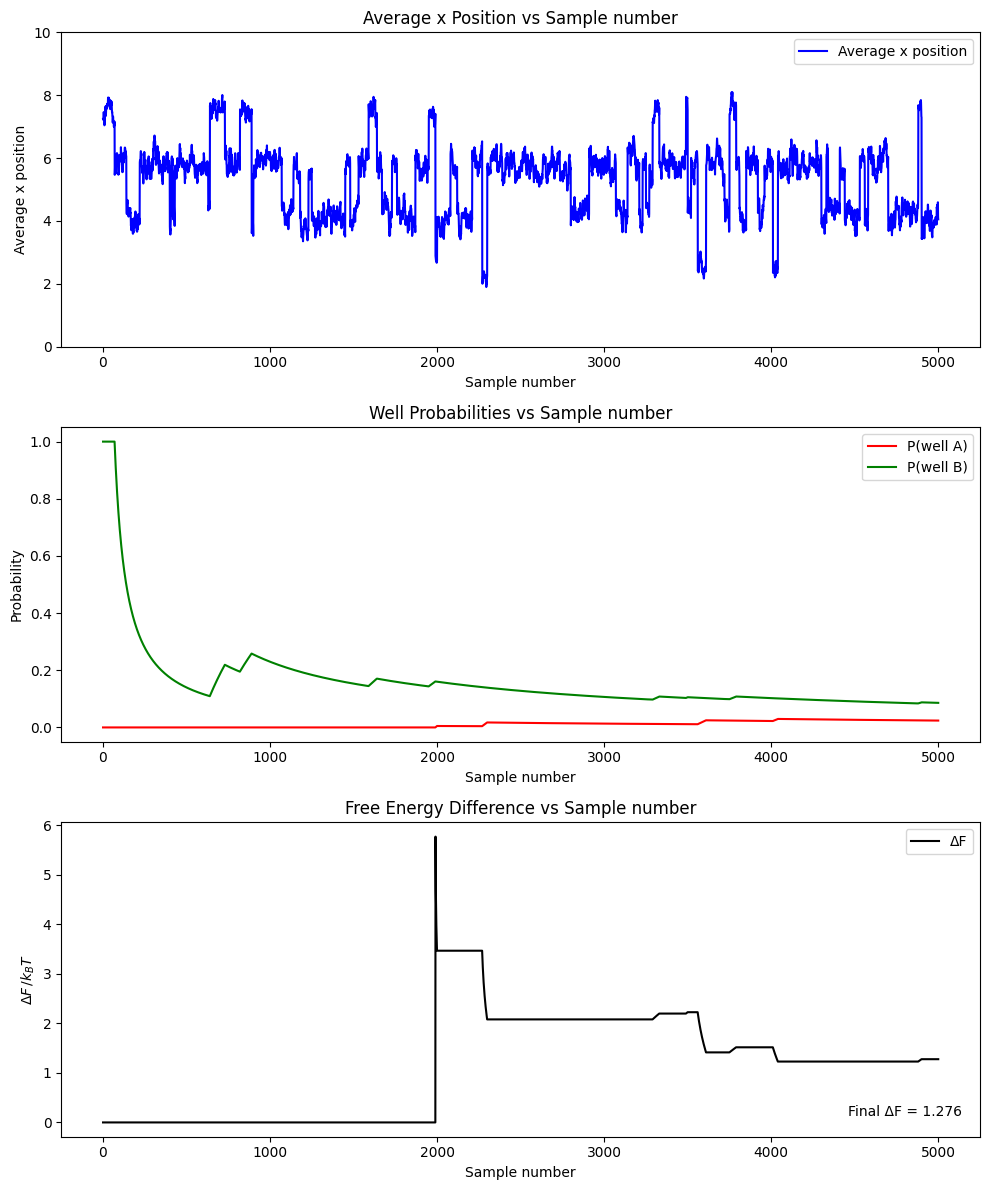

final mean delta f = 1.5945758828416998
final standard error delta f = 0.10166071801723346
final std delta f = 1.0166071801723346


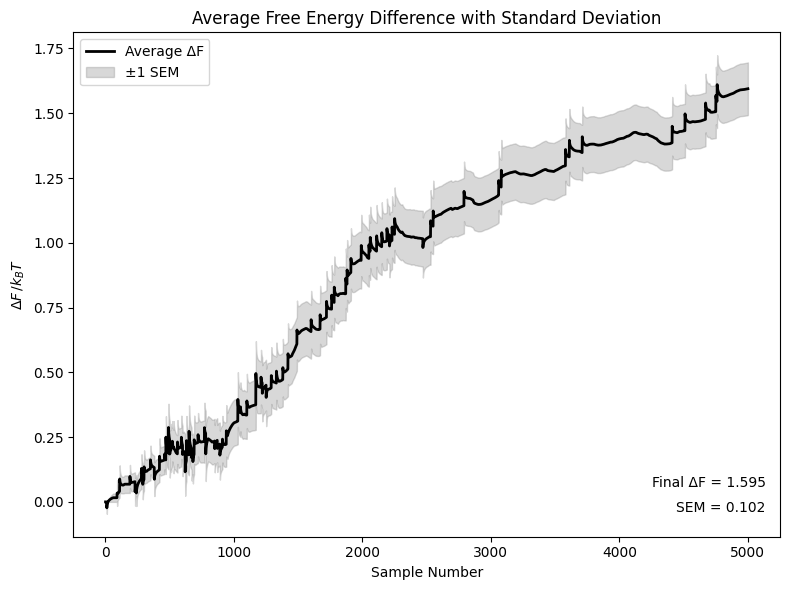

In [4]:
free_energy_array = []
START_IDX = 5000
HALF_BOX = 5
R0 = 1.2


for run_num in range(1, 101):
    run_str = f"{run_num:03d}"  # Format as 001, 002, etc.
    
    try:
        # Load configurations for this run

        if run_num % 10 == 0:
            print(f"at run {run_num}")
        configs_testing_path = f"/home/n2401517d/my_workspace/HMC_NF/results/test_feeding_N3_T_1.0_V_0.50KT_pnas_full/mc_runs/run_{run_str}/mc_run_testing_configs.npy"
        testing_configs = np.load(configs_testing_path)
        testing_configs = testing_configs[START_IDX:]
        
        avg_x_values, p_a_values, p_b_values, deltaF_normalized_values, runs = calculate_well_statistics(testing_configs, 0, HALF_BOX, R0)
        
        # Add this run's free energy data to the array
        free_energy_array.append(deltaF_normalized_values)

        if run_num % 50 == 0:    
            
            # Create figure with subplots
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
            
            # Plot individual particle positions and average x position
            ax1.plot(runs, avg_x_values, 'blue', label='Average x position', alpha=1.0)
            ax1.set_xlabel('Sample number')
            ax1.set_ylabel('Average x position')
            ax1.set_title('Average x Position vs Sample number')
            ax1.set_ylim(0, HALF_BOX * 2)
            ax1.legend()
            
            # Plot probabilities over time
            ax2.plot(runs, p_a_values, 'r-', label='P(well A)')
            ax2.plot(runs, p_b_values, 'g-', label='P(well B)')
            ax2.set_xlabel('Sample number')
            ax2.set_ylabel('Probability')
            ax2.set_title('Well Probabilities vs Sample number')
            ax2.legend()
            
            # Plot free energy difference over time
            ax3.plot(runs, deltaF_normalized_values, 'k-', label='ΔF')
            ax3.set_xlabel('Sample number')
            ax3.set_ylabel(r'$\Delta F\, / k_B T$')
            ax3.set_title('Free Energy Difference vs Sample number')
            ax3.legend()
            
            # Add text label with final free energy value
            final_deltaF = deltaF_normalized_values[-1]
            ax3.text(0.98, 0.1, f'Final ΔF = {final_deltaF:.3f}', 
                    horizontalalignment='right',
                    verticalalignment='top',
                    transform=ax3.transAxes)
            
            plt.tight_layout()
            
            plt.show()
            plt.close(fig)
        
    except Exception as e:
        print(f"Error processing run {run_num}: {e}")

#AVG FREE ENERGY ACROSS ALL RUNS PLOT
# Convert list of free energy arrays to numpy array for calculations
all_deltaF = np.array(free_energy_array)

# Calculate mean and standard error across runs
mean_deltaF = np.nanmean(all_deltaF, axis=0)
sem_deltaF = np.nanstd(all_deltaF, axis=0) / np.sqrt(all_deltaF.shape[0])
std_deltaF = np.nanstd(all_deltaF, axis=0)

print("final mean delta f =", mean_deltaF[-1])
print("final standard error delta f =", sem_deltaF[-1])
print("final std delta f =", std_deltaF[-1])

# Plot the average free energy with error shading
steps = np.arange(1, len(mean_deltaF) + 1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(steps, mean_deltaF, color='black', lw=2, label='Average ΔF')
ax.fill_between(steps, mean_deltaF - sem_deltaF, mean_deltaF + sem_deltaF, 
                color='gray', alpha=0.3, label='±1 SEM')
# Add text annotations for final values
ax.text(0.98, 0.12, f'Final ΔF = {mean_deltaF[-1]:.3f}', 
        transform=ax.transAxes, ha='right', va='top')
ax.text(0.98, 0.07, f'SEM = {sem_deltaF[-1]:.3f}',
        transform=ax.transAxes, ha='right', va='top')

ax.set_xlabel('Sample Number')
ax.set_ylabel(r'$\Delta F\, / k_B T$')
ax.set_title('Average Free Energy Difference with Standard Deviation')
ax.legend()
plt.tight_layout()
plt.show(fig)